In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("Iris Flower - Iris.csv")

In [ ]:
print(data.head())
print(data.info())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [ ]:
print(data.size)
print(data.shape)
print(data.describe())

900
(150, 6)
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data = data.drop(['Id'], axis=1)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Text(0, 0.5, 'count')

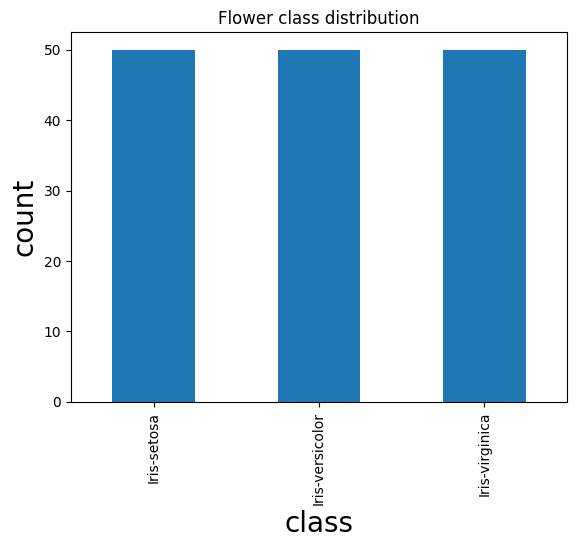

In [ ]:
import matplotlib.pyplot as plt
nameplot = data['Species'].value_counts().plot.bar(title='Flower class distribution')
nameplot.set_xlabel('class',size=20)
nameplot.set_ylabel('count',size=20)

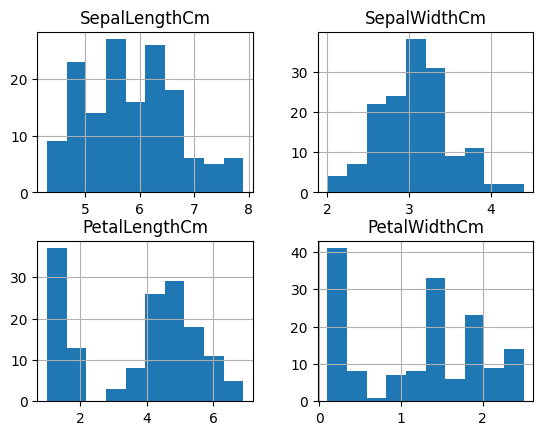

In [ ]:
data.hist()
plt.show()

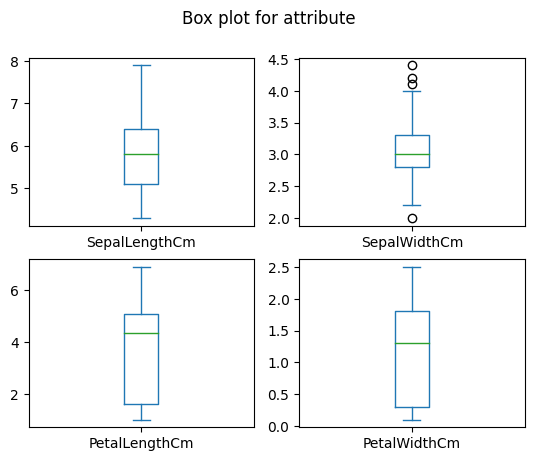

In [ ]:
data.plot(kind='box', subplots=True, layout=(2,2),
               sharex=False, sharey=False, title="Box plot for attribute")
plt.show()

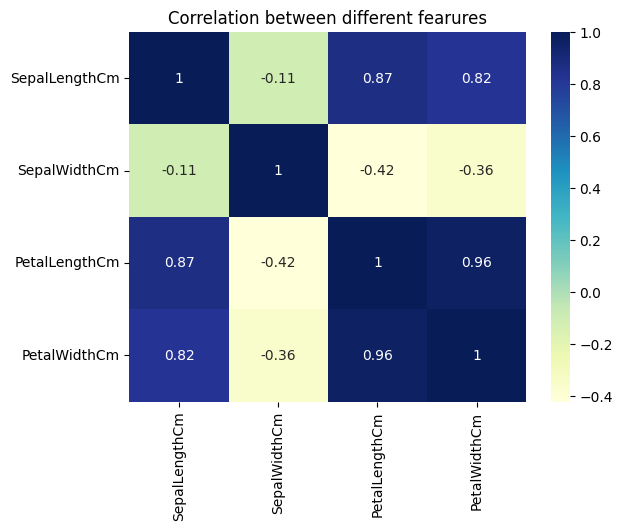

In [ ]:
import seaborn as sb
numeric_data = data.select_dtypes(include='number')
dataplot = sb.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation between different fearures')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['Species'], axis=1)
Y = data['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("Y_train.shape:", X_train.shape)
print("Y_test.shape:", Y_test.shape)

X_train.shape: (120, 4)
X_test.shape: (30, 4)
Y_train.shape: (120, 4)
Y_test.shape: (30,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
print("Logistic Regression")
print("Accuracy")
print( accuracy_score(Y_test, y_pred))
print("Precision")
print(precision_score(Y_test, y_pred, average='weighted'))
print(confusion_matrix(Y_test, y_pred))

Logistic Regression
Accuracy
0.9666666666666667
Precision
0.9703703703703703
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_scaled, Y_train)
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
print("Decision Tree")
print("Accuracy")
print( accuracy_score(Y_test, y_pred))
print("Precision")
print(precision_score(Y_test, y_pred, average='weighted'))
print(confusion_matrix(Y_test, y_pred))

Decision Tree
Accuracy
0.9333333333333333
Precision
0.9333333333333333
[[14  0  0]
 [ 0  7  1]
 [ 0  1  7]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scaled, Y_train)
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
print("Naive Bayes")
print("Accuracy")
print( accuracy_score(Y_test, y_pred))
print("Precision")
print(precision_score(Y_test, y_pred, average='weighted'))
print(confusion_matrix(Y_test, y_pred))

Naive Bayes
Accuracy
0.9666666666666667
Precision
0.9703703703703703
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
